# Providing data-driven suggestions for HR

using a regression and machine learning model to predict whether or not an employee will leave the company.

# Understand the business scenario and problem
The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They are asking to provide data-driven suggestions based on understanding of the data. They have the following question: what’s likely to make the employee leave the company?

The goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If we can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

In [1]:
#Import libraries and packages

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

In [2]:
#Load the dataset
file = '/Users/mrunalibharshankar/Documents/Salifort_Motor_HR_dataset/HR_capstone_dataset.csv'
data = pd.read_csv(file)

In [3]:
#display first 10 rows of the dataset
data.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


# Data Exploration (Initial EDA and data cleaning)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
data.shape

(14999, 10)

In [6]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
#renaming the column names
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
data = data.rename(columns = {'average_montly_hours': 'average_monthly_hours', 
           'time_spend_company': 'tenure',
           'Work_accident': 'work_accident',
           'Department': 'department'})

In [9]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [10]:
# Check for missing values
data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [11]:
#check duplicates
data.duplicated().sum()

3008

In [12]:
#duplicates in dataset
data[data.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [13]:
# Drop duplicates and save resulting dataframe in a new variable
df = data.drop_duplicates(keep = 'first')


In [14]:
#check if new data has duplicates
df.duplicated().sum()

0

In [15]:
# Display first few rows of new dataframe as needed
df[df.duplicated()].sum()

satisfaction_level       0.0
last_evaluation          0.0
number_project           0.0
average_monthly_hours    0.0
tenure                   0.0
work_accident            0.0
left                     0.0
promotion_last_5years    0.0
department               0.0
salary                   0.0
dtype: float64

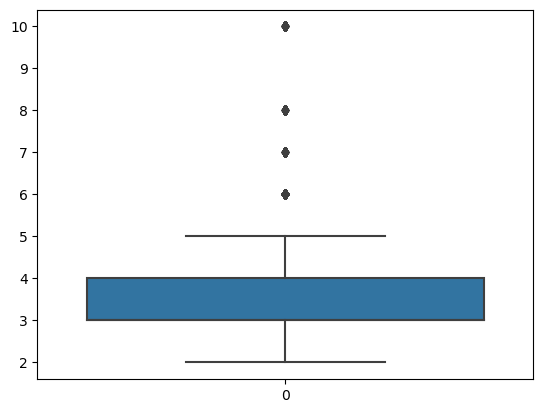

In [16]:
#Check for outliers in the data.
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(df['tenure']);

In [17]:
# Determine the number of rows containing outliers
percentile25 = df['tenure'].quantile(0.25)
percentile75 = df['tenure'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print('Upper_limit:', upper_limit)
print('lower_limit:', lower_limit)


outliers = df[(df['tenure'] > upper_limit) | (df['tenure']< lower_limit)]

print('No. of outlier:', len(outliers))

Upper_limit: 5.5
lower_limit: 1.5
No. of outlier: 824


Certain types of models are more sensitive to outliers than others. Considering whether to remove outliers, based on the type of model you decide to use.

# Data Exploration


In [18]:
#Begin by understanding how many employees left and what percentage of all employees this figure represents.
# Get numbers of people who left vs. stayed
print('No. of employees stayed and left:', df['left'].value_counts())

# Get percentages of people who left vs. stayed
df['left'].value_counts(normalize = True)

No. of employees stayed and left: 0    10000
1     1991
Name: left, dtype: int64


0    0.833959
1    0.166041
Name: left, dtype: float64

# Data visualizations
creating plots to visualize relationships between variables in the data.

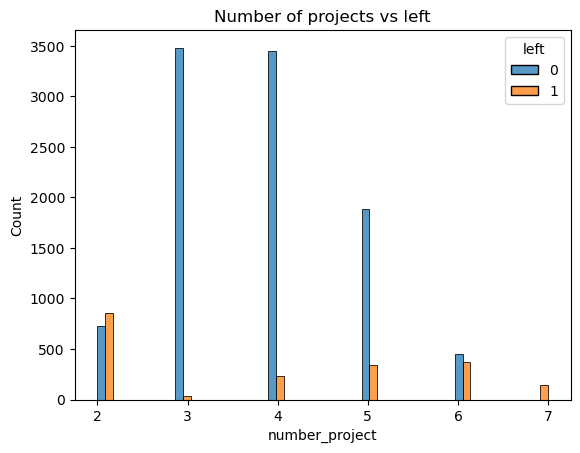

In [19]:
#histogram plot of number of projects and employees left

fig = sns.histplot(data = df, x = 'number_project',hue = 'left',  multiple = 'dodge' )
fig.set_title('Number of projects vs left');

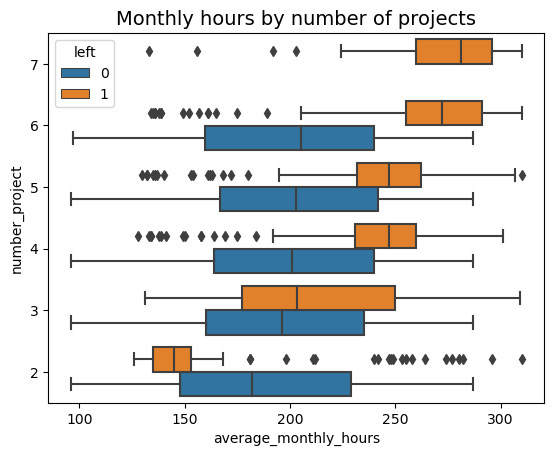

In [20]:
# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
fig = sns.boxplot(data=df, x='average_monthly_hours', y='number_project', hue='left', orient="h")
fig.invert_yaxis()
fig.set_title('Monthly hours by number of projects', fontsize='14');


1. those who worked considerably less than their peers with the same number of projects, and 
2. those who worked much more.

In [21]:
# Get value counts of stayed/left for employees with 7 projects
df[df['number_project'] == 7]['left'].value_counts()

1    145
Name: left, dtype: int64

all the employees who has worked on 7 projects has left the company.

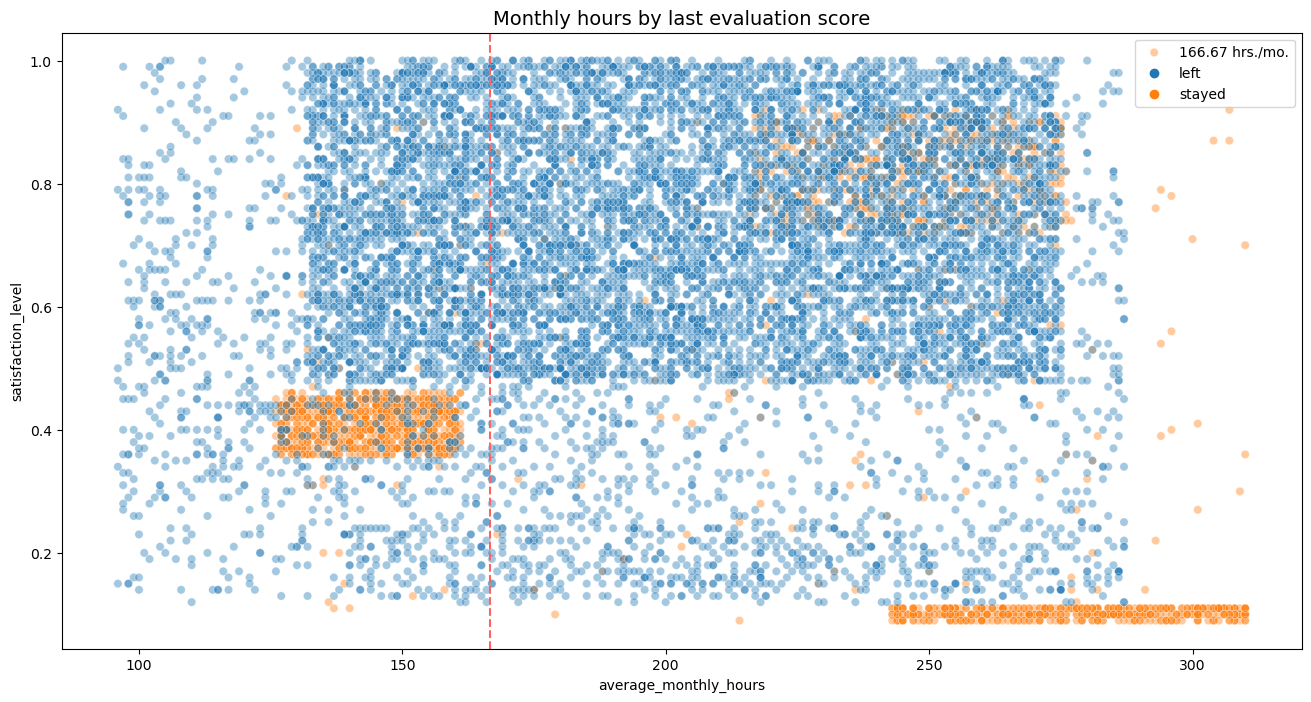

In [22]:
#the average monthly hours versus the satisfaction levels.
plt.figure(figsize=(16,8))
figure = sns.scatterplot(data=df, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

from the plot, the employees who has worked more than ~240-320 hours has satisfaction level of 0 and left. employees who has worked for more than 220-280 hours have given satisfaction 0.7-0.9 and left theirs another group of employees ~120-160 hours has satisfaction level of 0.3-0.4 and left

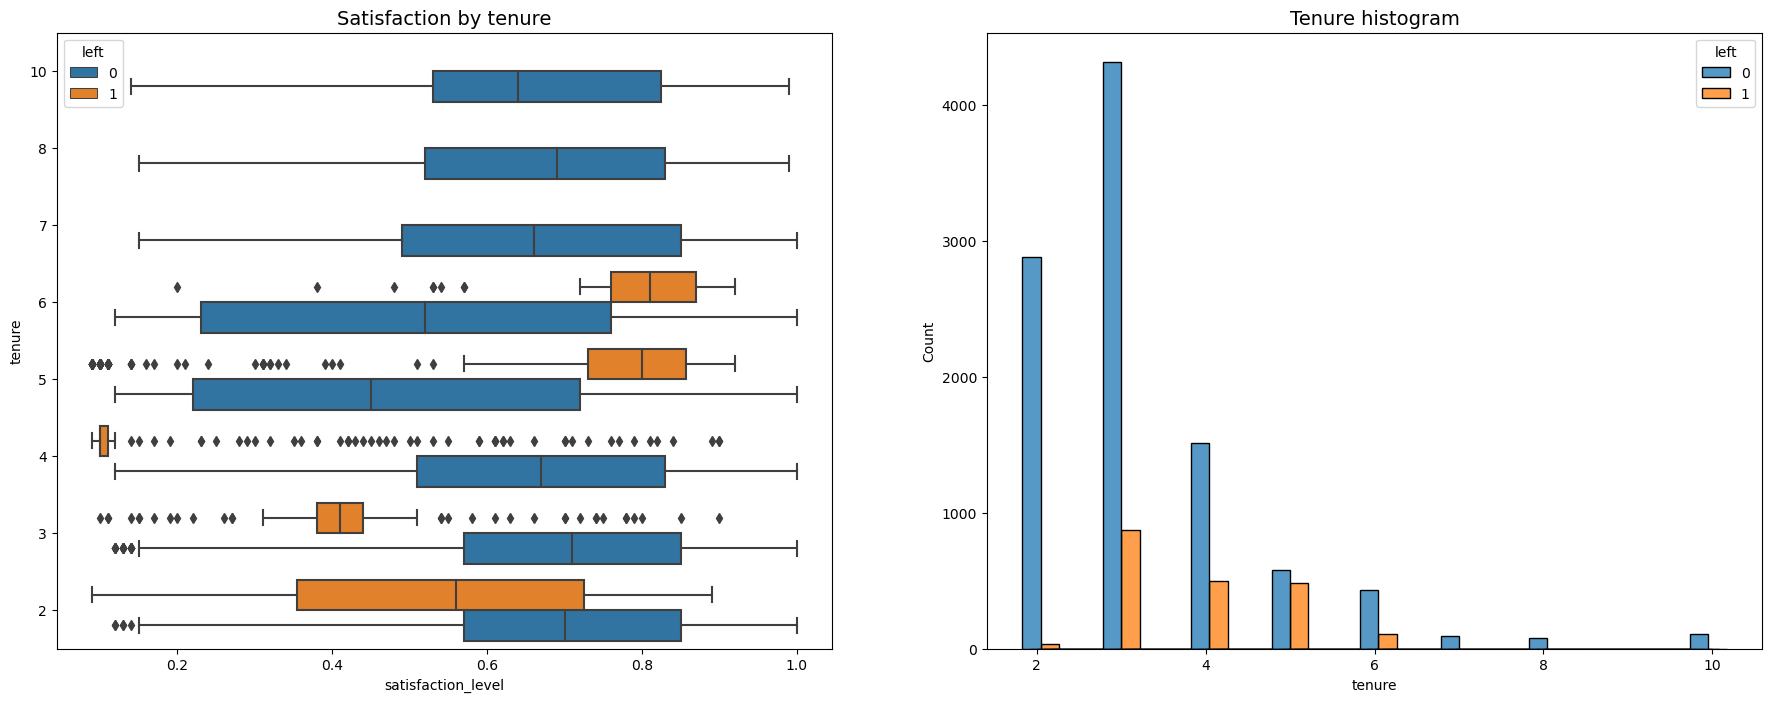

In [23]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df[df['left']==0]['tenure']
tenure_left = df[df['left']==1]['tenure']
sns.histplot(data=df, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures. Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible. The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed. The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees. As the next step in analyzing the data, you could calculate the mean and median satisfaction scores of employees who left and those who didn't.

In [24]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


In [25]:
long_tenure = df[df['tenure'] > 6]
short_tenure = df[df['tenure'] < 6]

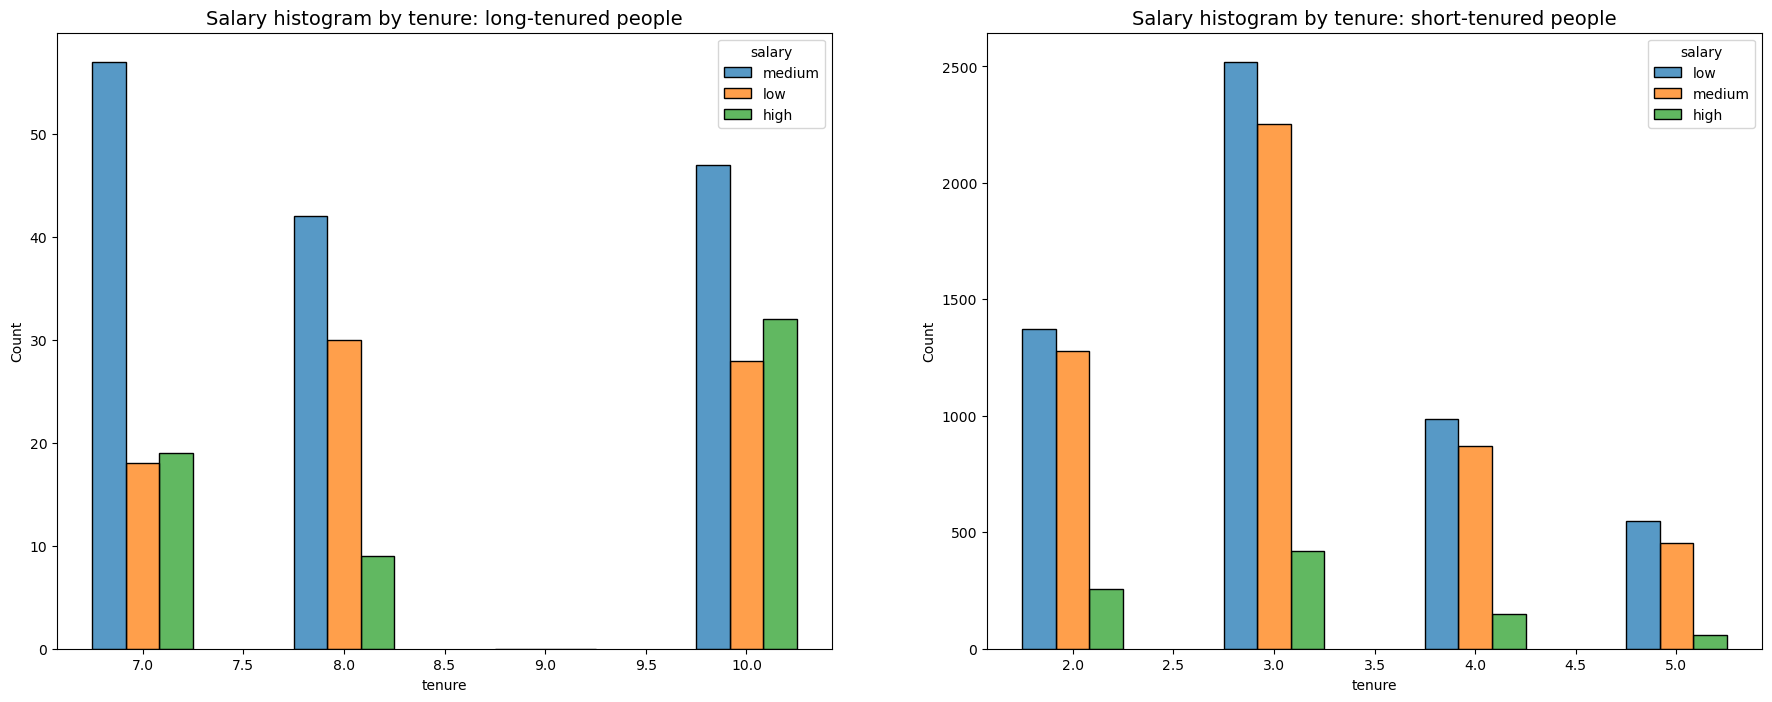

In [26]:
#salary levels for different tenures.
fig, ax = plt.subplots(1, 2, figsize = (22,8))
sns.histplot(data = long_tenure, x = 'tenure' , hue = 'salary', multiple = 'dodge', discrete = '1', shrink=.5, ax= ax[0])
ax[0].set_title('Salary histogram by tenure: long-tenured people', fontsize='14')

sns.histplot(data = short_tenure, x = 'tenure' , hue = 'salary', multiple = 'dodge', discrete = '1', shrink=.5, ax = ax[1])
ax[1].set_title('Salary histogram by tenure: short-tenured people', fontsize='14');

long-tenure employees has more salary than low tenure.

Next, explore whether there's a correlation between working long hours and receiving high evaluation scores. You could create a scatterplot of average_monthly_hours versus last_evaluation.

In [27]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
tenure                     int64
work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

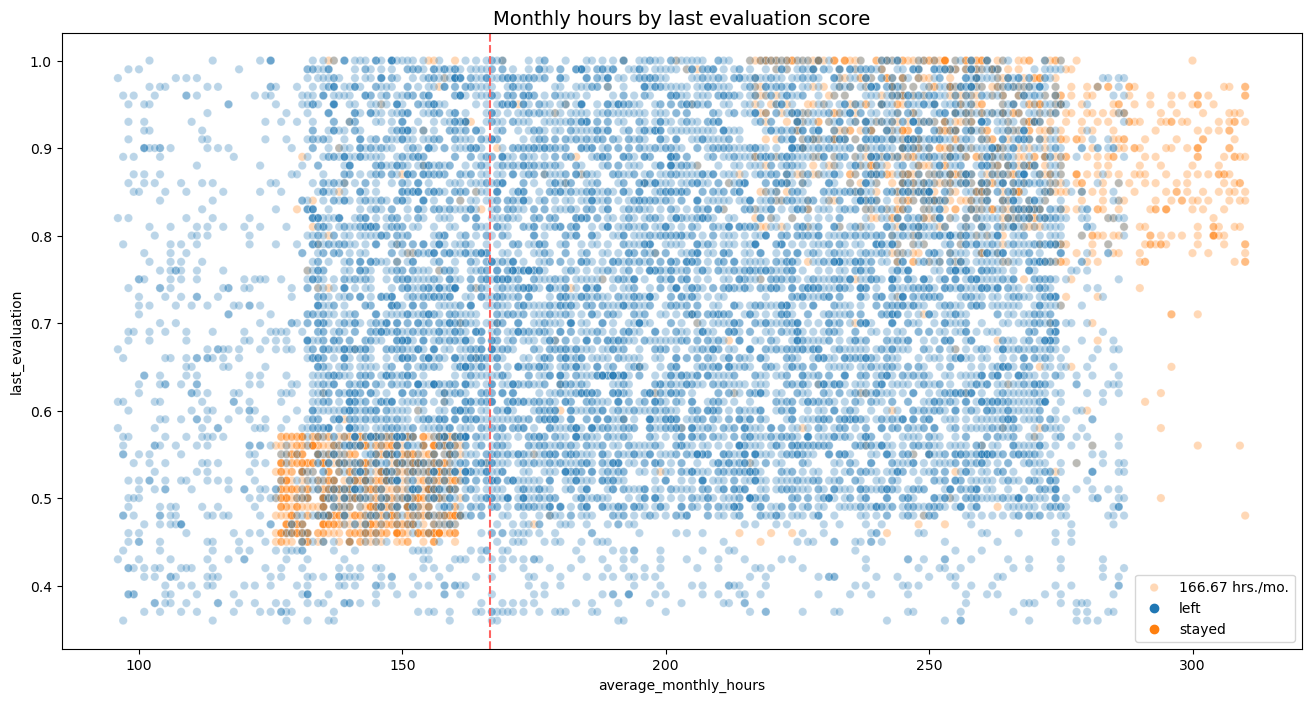

In [28]:
plt.figure(figsize=(16,8))
sns.scatterplot(data= df, x = 'average_monthly_hours', y = 'last_evaluation', hue = 'left', alpha =0.3);
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

Next, examine whether employees who worked very long hours were promoted in the last five years.

In [29]:
df[(df['average_monthly_hours'] > 167) & (df['promotion_last_5years'] == 1)]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
287,0.11,0.79,6,292,4,0,1,1,technical,low
1000,0.87,1.00,4,258,5,1,1,1,sales,medium
4502,0.72,0.49,3,203,3,0,0,1,RandD,medium
4503,0.95,0.96,5,175,3,1,0,1,RandD,medium
4507,0.50,0.60,4,200,2,0,0,1,support,medium
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,0,1,management,high
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high


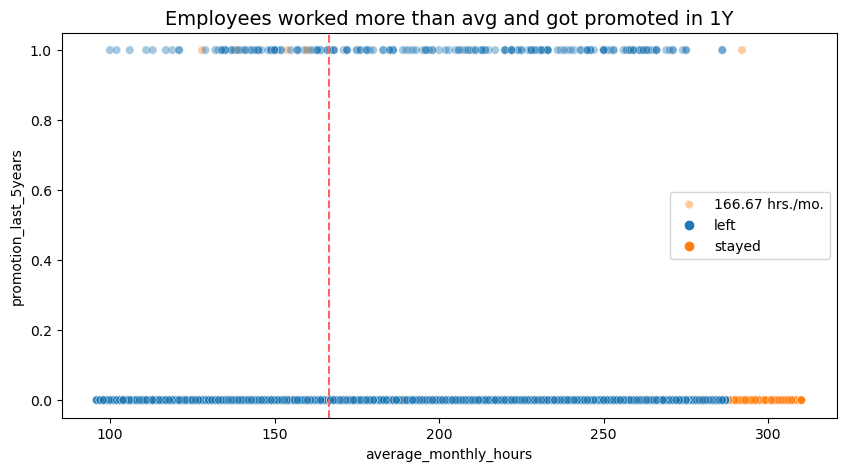

In [30]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = df, x = 'average_monthly_hours', y = 'promotion_last_5years', hue = 'left', alpha = 0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Employees worked more than avg and got promoted in 1Y', fontsize='14');

The plot above shows the following:

1.very few employees who were promoted in the last five years left

2.very few employees who worked the most hours were promoted

3.all of the employees who left were working the longest hours

Next,inspect how the employees who left are distributed across departments.

In [31]:
df['department'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

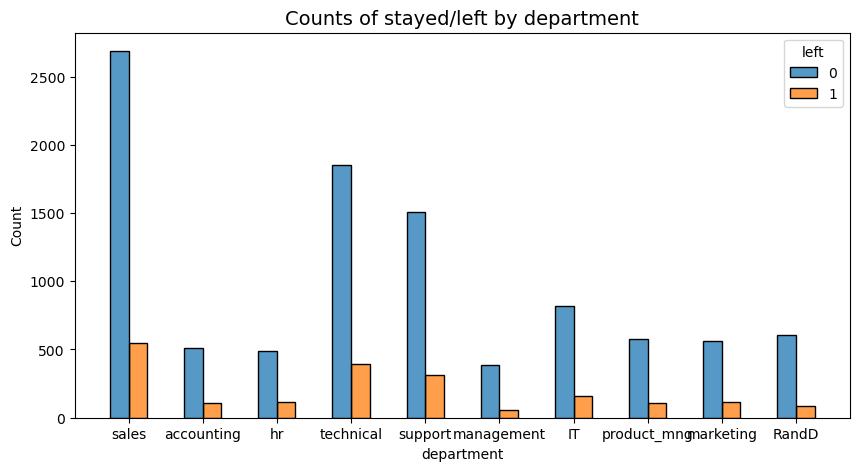

In [32]:
plt.figure(figsize = (10,5))
sns.histplot(data = df, x = 'department', hue = 'left', multiple = 'dodge', discrete = '1', shrink = .5 )
plt.title('Counts of stayed/left by department', fontsize=14);

There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed.

Lastly, checking for strong correlations between variables in the data.

In [33]:
df.corr(method='pearson')

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
average_monthly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
tenure,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


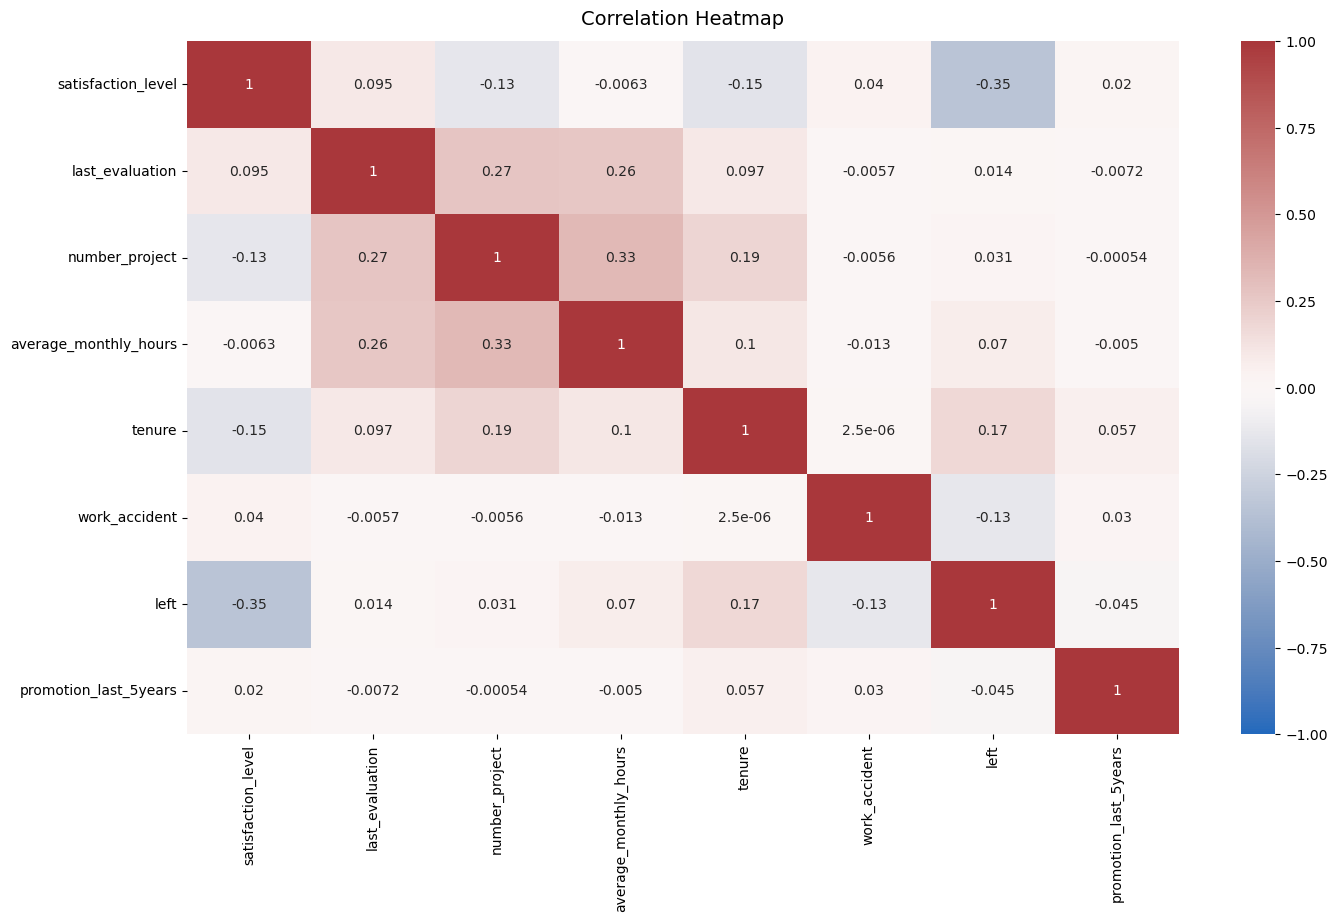

In [34]:
# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores and to some extend tenure all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

# Insights
It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave.

# Identify the type of prediction task

Goal is to predict whether an employee leaves the company, which is a categorical outcome variable. So this task involves classification. More specifically, this involves binary classification, since the outcome variable left can be either 1 (indicating employee left) or 0 (indicating employee didn't leave).

Will build Logistics regression model first and will compare which one serves the best results.

### Modeling

In [35]:
df.head()
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
tenure                     int64
work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [36]:
df['salary'].value_counts()

low       5740
medium    5261
high       990
Name: salary, dtype: int64

Handling Categorical data

In [37]:
# Copy the dataframe
df_enc1 = df.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc1['salary'] = (
    df_enc1['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc1 = pd.get_dummies(df_enc1, drop_first=False)

# Display the new dataframe
df_enc1.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [38]:
df_enc1['salary'].value_counts()

0    5740
1    5261
2     990
Name: salary, dtype: int64

Create a heatmap to visualize how correlated variables are. Consider which variables you're interested in examining correlations between.

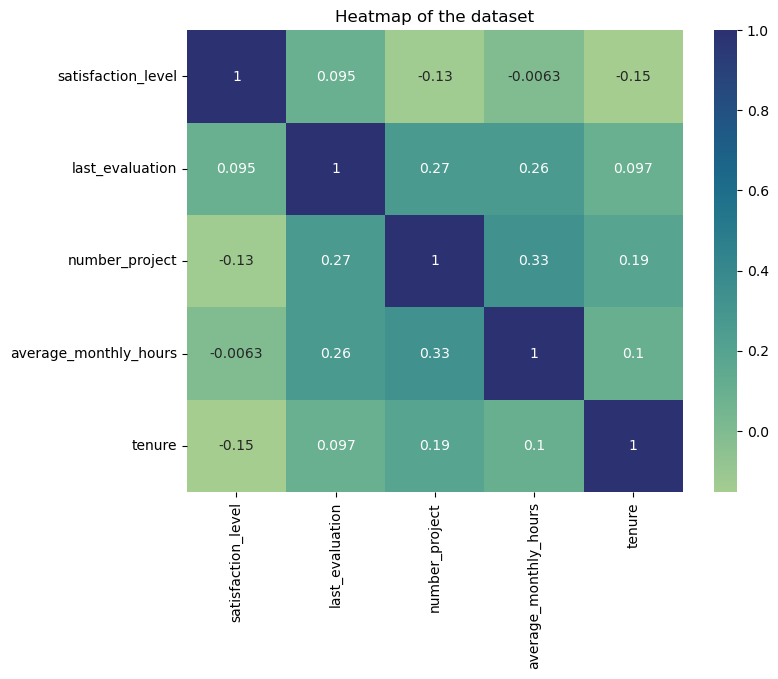

In [39]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc1[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

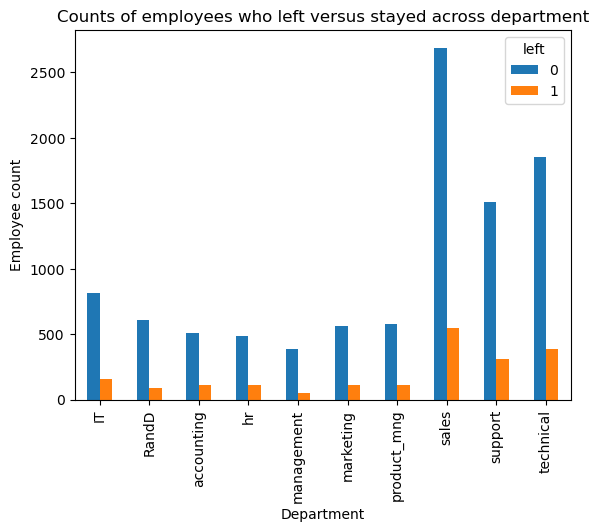

In [40]:
# Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't
pd.crosstab(df['department'], df['left']).plot(kind ='bar')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

In [41]:
df_logreg = df_enc1[(df_enc1['tenure'] >= lower_limit) & (df_enc1['tenure'] <= upper_limit)]
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [42]:
#isolate y and X variables 

y = df_logreg['left']
X = df_logreg.drop('left', axis = 1)

Checking class imbalance

In [45]:
df_logreg['left'].value_counts(normalize= True)

0    0.831468
1    0.168532
Name: left, dtype: float64

In [46]:
X.shape, y.shape

((11167, 18), (11167,))

Splitting the data

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.20, stratify=y, random_state =42)

In [48]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8933, 18), (2234, 18), (8933,), (2234,))

Instantiate logistic Regression model

In [49]:
log_model = LogisticRegression(random_state = 42,max_iter=500)

In [50]:
log_clf = log_model.fit(X_train, y_train)

In [51]:
y_pred = log_clf.predict(X_test)

In [185]:
def log_scores(model_name:str, model):
    
    y_pred = log_clf.predict(X_test)
    target_names = ['Predicted would not leave', 'Predicted would leave']
    print("Classification Report:")
    print(classification_report(y_test,y_pred,target_names=target_names))
    print('-'*50)
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
    

    auc = roc_auc_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                         })
  
    return table

Classification Report:
                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      1857
    Predicted would leave       0.44      0.27      0.34       377

                 accuracy                           0.82      2234
                macro avg       0.65      0.60      0.62      2234
             weighted avg       0.79      0.82      0.80      2234

--------------------------------------------------


,model,precision,recall,f1,accuracy,AUC
0,Logistic Regression,0.441558,0.270557,0.335526,0.819158,0.600545


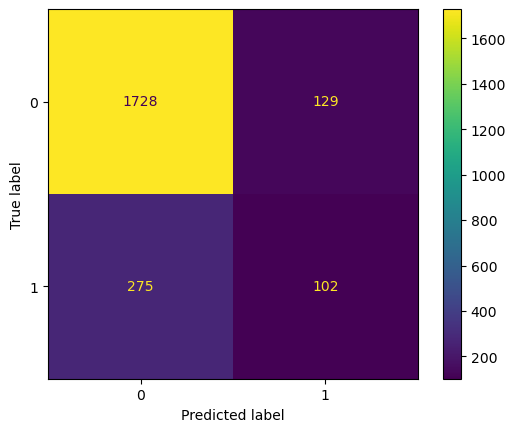

In [154]:
log_scores('Logistic Regression', log_clf)

True negatives: The number of people who did not leave(0) that the model accurately predicted did not leave(0).

False positives: The number of people who did not leave(0) the model inaccurately predicted as leaving(1).

False negatives: The number of people who left(1) that the model inaccurately predicted did not leave(0)

True positives: The number of people who left(1) the model accurately predicted as leaving(1)

In [184]:
auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

log_reg = pd.DataFrame({'model': 'logistic Regression',
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                         })
log_reg

,model,precision,recall,f1,accuracy,auc
0,logistic Regression,0.441558,0.270557,0.335526,0.819158,0.600545


# Cross Validation with k-fold(k=4)

In [138]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

results = {}


# Define the list of scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Perform k-fold cross-validation (e.g., 4-fold cross-validation) for each scoring metric
k = 4
for metric in scoring:
    cross_val = cross_val_score(log_clf, X, y, cv=k, scoring=metric)
    results[metric] = cross_val
    results_df = pd.DataFrame(results)
print(results_df)

   accuracy  precision    recall        f1   roc_auc
0  0.823782   0.458498  0.246285  0.320442  0.896977
1  0.820201   0.437247  0.229299  0.300836  0.883555
2  0.827364   0.475207  0.244681  0.323034  0.885595
3  0.828019   0.479675  0.251064  0.329609  0.884205


In [140]:
best_score = results_df.max()
best_score

accuracy     0.828019
precision    0.479675
recall       0.251064
f1           0.329609
roc_auc      0.896977
dtype: float64

In [145]:
#Identify best metric and score from cross validation
best_metric = results_df.idxmax()
best_score = results_df.max()

print(f"The best scoring metric is: ")
print(f"{best_score}")

The best scoring metric is: 
accuracy     0.828019
precision    0.479675
recall       0.251064
f1           0.329609
roc_auc      0.896977
dtype: float64


In [183]:
def cross_val_score(model_name:str, model_object, metric:str ):
    
    y_pred = log_clf.predict(X_test)
    target_names = ['Predicted would not leave', 'Predicted would leave']
    print("Classification Report:")
    print(classification_report(y_test,y_pred,target_names=target_names))
    print('-'*50)
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
    
            
    best_score = results_df.max()

    precision = best_score['precision']
    recall = best_score['recall']
    f1 = best_score['f1']
    accuracy = best_score['accuracy']
    auc = best_score['roc_auc']

    
    

    # Create a DataFrame for summary statistics
    log_cv_table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                         })
  
    return log_cv_table


    
        

Classification Report:
                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      1857
    Predicted would leave       0.44      0.27      0.34       377

                 accuracy                           0.82      2234
                macro avg       0.65      0.60      0.62      2234
             weighted avg       0.79      0.82      0.80      2234

--------------------------------------------------


,model,precision,recall,f1,accuracy,AUC
0,Logistic Regression CV,0.479675,0.251064,0.329609,0.828019,0.896977


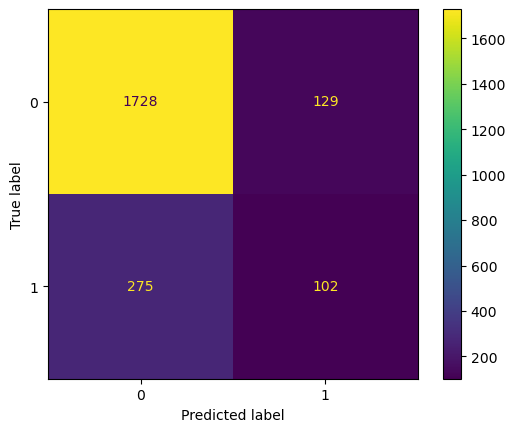

In [148]:
cross_val_score('Logistic Regression CV', cross_val, 'auc' )

The classification report above shows that the logistic regression cv model achieved a precision of 47%, recall of 25%, f1-score of 32% (all weighted averages), and accuracy of 89%. However, if it's most important to predict employees who leave, then the scores are significantly lower.

In [188]:
best_score = results_df.max()

precision = best_score['precision']
recall = best_score['recall']
f1 = best_score['f1']
accuracy = best_score['accuracy']
auc = best_score['roc_auc']

    
    

    
log_cv_table = pd.DataFrame({'model': 'logistic regression cv',
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                         })
log_cv_table

,model,precision,recall,f1,accuracy,auc
0,logistic regression cv,0.479675,0.251064,0.329609,0.828019,0.896977


In [189]:
logistic_regression_results = pd.concat([log_cv_table, log_reg])
logistic_regression_results

,model,precision,recall,f1,accuracy,auc
0,logistic regression cv,0.479675,0.251064,0.329609,0.828019,0.896977
0,logistic Regression,0.441558,0.270557,0.335526,0.819158,0.600545


From the above table its clear that logistic regession cross validation yeild a good results compared to logistic regression

# Build Decision Tree Model

In [72]:
df_enc1

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,2,0,0,0,0,1,0,0,0,0,0
11996,0.74,0.95,5,266,10,0,0,1,2,0,0,0,0,1,0,0,0,0,0
11997,0.85,0.54,3,185,10,0,0,1,2,0,0,0,0,1,0,0,0,0,0
11998,0.33,0.65,3,172,10,0,0,1,2,0,0,0,0,0,1,0,0,0,0


In [73]:
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [74]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [116]:
#split train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, stratify = y, random_state = 0)

In [117]:
X_train.shape, X_test.shape , y_train.shape , y_test.shape

((8993, 18), (2998, 18), (8993,), (2998,))

# Construct a decision tree model and set up cross-validated grid-search to search for the best model parameters.

In [75]:
from sklearn.metrics import make_scorer

# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

scoring = {
    'f1': make_scorer(f1_score),
    'recall': make_scorer(recall_score),
    'roc_auc': make_scorer(roc_auc_score),
    'precision': make_scorer(precision_score),
    'accuracy': make_scorer(accuracy_score)}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Fit the decision tree model to the training data.

In [76]:
%%time
tree1.fit(X_train, y_train)

CPU times: user 1.77 s, sys: 23 ms, total: 1.79 s
Wall time: 1.79 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score),
                      'roc_auc': make_scorer(roc_auc_score)})

In [77]:
# Check best parameters
tree1.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}

Identify the best AUC score achieved by the decision tree model on the training set.

In [78]:
# Check best AUC score on CV
tree1.best_score_

0.9565082400579585

This is a strong AUC score, which shows that this model can predict employees who will leave very well.



a function that will help to extract all the scores from the grid search.

In [180]:
def make_results(model_name:str, model_object, metric:str):   

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [197]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,f1,accuracy,auc
0,decision tree cv,0.975967,0.917594,0.945833,0.982312,0.956508


# Random Forest Model

In [81]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'f1': make_scorer(f1_score),
           'recall': make_scorer(recall_score),
           'roc_auc': make_scorer(roc_auc_score),
           'precision': make_scorer(precision_score),
           'accuracy': make_scorer(accuracy_score)}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Fit the random forest model to the training data.

In [82]:
%%time
rf1.fit(X_train, y_train)  #approx 14 mins

CPU times: user 12min 34s, sys: 3.27 s, total: 12min 37s
Wall time: 14min 35s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score),
                      'roc_auc': make_scorer(roc_auc_score)})

In [164]:
rf1.best_score_

0.9573859528361485

In [165]:
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [198]:
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
rf1_cv_results

,model,precision,recall,f1,accuracy,auc
0,random forest cv,0.985127,0.917599,0.950066,0.983768,0.957386


In [199]:
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        f1  accuracy       auc
0  decision tree cv   0.975967  0.917594  0.945833  0.982312  0.956508
              model  precision    recall        f1  accuracy       auc
0  random forest cv   0.985127  0.917599  0.950066  0.983768  0.957386


In [200]:
cv_results = pd.concat([tree1_cv_results,rf1_cv_results])
cv_results

,model,precision,recall,f1,accuracy,auc
0,decision tree cv,0.975967,0.917594,0.945833,0.982312,0.956508
0,random forest cv,0.985127,0.917599,0.950066,0.983768,0.957386


The evaluation scores of the random forest model are slightly better than those of the decision tree model, with the exception of recall (the recall score of the random forest model is approximately 0.001 lower, which is a negligible amount). This indicates that the random forest model mostly outperforms the decision tree model.

Next, you can evaluate the final model on the test set.

Define a function that gets all the scores from a model's predictions.

In [178]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    
    y_pred = model.best_estimator_.predict(X_test_data)
    print("Classification Report:")
    print(classification_report(y_test_data,y_pred))
    print('-'*50)
    ConfusionMatrixDisplay.from_predictions(y_test_data,y_pred)
    

    auc = roc_auc_score(y_test_data, y_pred)
    accuracy = accuracy_score(y_test_data, y_pred)
    precision = precision_score(y_test_data, y_pred)
    recall = recall_score(y_test_data, y_pred)
    f1 = f1_score(y_test_data, y_pred)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                         })
  
    return table

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1857
           1       0.99      0.93      0.96       377

    accuracy                           0.99      2234
   macro avg       0.99      0.96      0.98      2234
weighted avg       0.99      0.99      0.99      2234

--------------------------------------------------


,model,precision,recall,f1,accuracy,AUC
0,Random Forest,0.991525,0.931034,0.960328,0.987019,0.964709


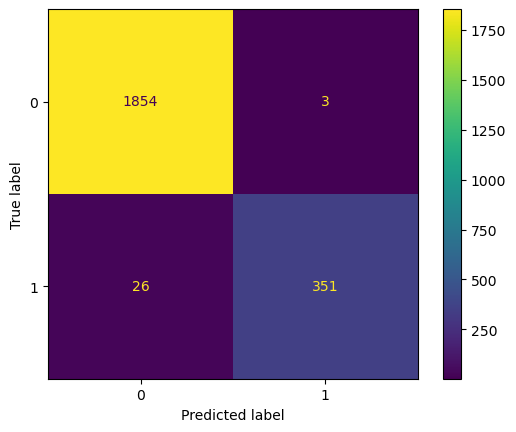

In [171]:
get_scores('Random Forest', rf1, X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1857
           1       0.99      0.93      0.96       377

    accuracy                           0.99      2234
   macro avg       0.99      0.97      0.98      2234
weighted avg       0.99      0.99      0.99      2234

--------------------------------------------------


,model,precision,recall,f1,accuracy,AUC
0,Decision Tree,0.988764,0.933687,0.960437,0.987019,0.965766


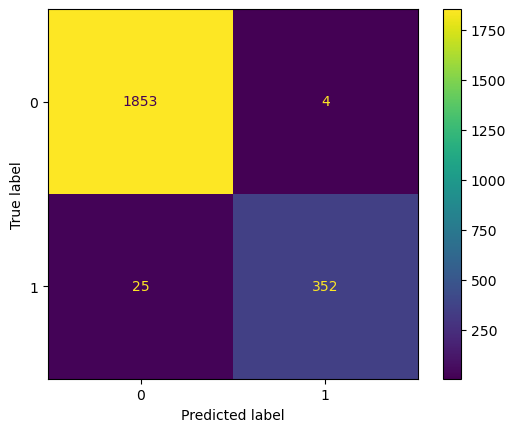

In [172]:
get_scores('Decision Tree', tree1, X_test, y_test)

In [202]:
cv_results

,model,precision,recall,f1,accuracy,auc
0,decision tree cv,0.975967,0.917594,0.945833,0.982312,0.956508
0,random forest cv,0.985127,0.917599,0.950066,0.983768,0.957386


In [192]:

logistic_regression_results

,model,precision,recall,f1,accuracy,auc
0,logistic regression cv,0.479675,0.251064,0.329609,0.828019,0.896977
0,logistic Regression,0.441558,0.270557,0.335526,0.819158,0.600545


In [201]:
final_results = pd.concat([logistic_regression_results,cv_results ])
final_results

,model,precision,recall,f1,accuracy,auc
0,logistic regression cv,0.479675,0.251064,0.329609,0.828019,0.896977
0,logistic Regression,0.441558,0.270557,0.335526,0.819158,0.600545
0,decision tree cv,0.975967,0.917594,0.945833,0.982312,0.956508
0,random forest cv,0.985127,0.917599,0.950066,0.983768,0.957386


The test scores are very similar to the validation scores, which is good. This appears to be a strong model. Since this test set was only used for this model, model's performance on train data is representative of how it will perform on new, unseeen data.

from the above final results its clear that the best model is Random Forest with some exceptional metric scores.

The model predicts more false positives than false negatives, which means that some employees may be identified as at risk of quitting or getting fired, when that's actually not the case. But this is still a strong model.

For exploratory purpose, want to inspect the splits of the decision tree model and the most important features in the random forest model.

DecisionTreeClassifier(max_depth=6, random_state=0)

#### Decision Tree split

In [206]:
#tree1_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree1_importances = pd.DataFrame(tree1.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree1_importances = tree1_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree1_importances = tree1_importances[tree1_importances['gini_importance'] != 0]
tree1_importances

,gini_importance
satisfaction_level,0.538541
tenure,0.160606
last_evaluation,0.135292
number_project,0.113908
average_monthly_hours,0.051023
department_product_mng,0.000567
department_technical,0.000063


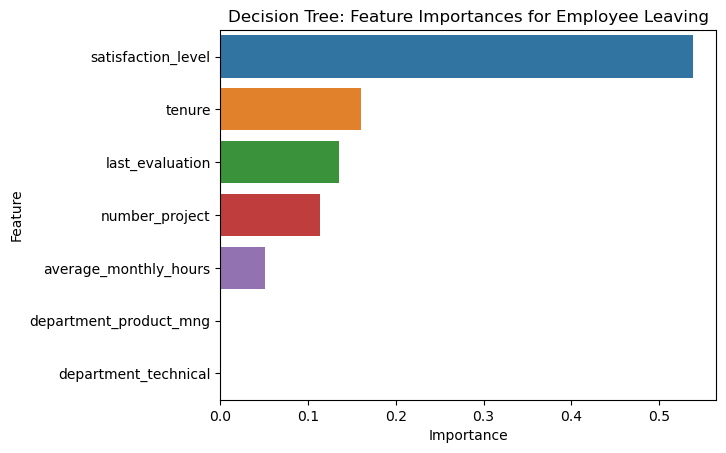

In [209]:
sns.barplot(data=tree1_importances, x="gini_importance", y=tree1_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The barplot above shows that in this decision tree model,satisfaction_level,tenure, last_evaluation, number_project, and average_monthly_hours have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, left.

#### Random forest feature importance

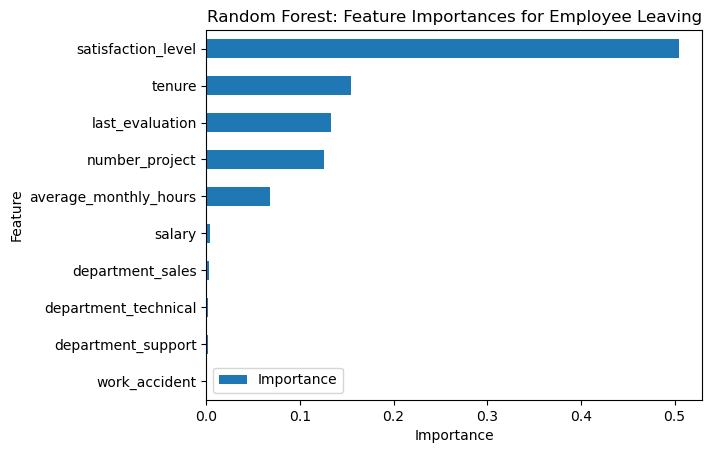

In [210]:
# Get feature importances
feat_impt = rf1.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf1.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The plot above shows that in this random forest model, `last_evaluation`, `number_project`, `tenure`, and `overworked` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`, and they are the same as the ones used by the decision tree model.

#### Recall evaluation metrics
1. AUC is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
2. Precision measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
3. Recall measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
4. Accuracy measures the proportion of data points that are correctly classified.
5. F1-score is an aggregation of precision and recall.

#### Summary of model results
1. Logistic Regression

      The logistic regression model achieved precision of 80%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%, on the test set.

2. Tree-based Machine Learning

    The decision tree model achieved AUC of 95.65%, precision of 97.59%, recall of 90.4%, f1-score of 94.58%, and accuracy of 98.23%, on the test set. The random forest modestly outperformed the decision tree model.


#### Conclusion, Recommendations, Next Steps
The models and the feature importances extracted from the models confirm that employees at the company are overworked.

#### To retain employees, the following recommendations could be presented to the stakeholders:

1. Cap the number of projects that employees can work on.
2. Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied.
3. Either reward employees for working longer hours, or don't require them to do so.
4. If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear.
5. Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts.
6. High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort.